In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
A=pd.read_csv('/content/drive/My Drive/Case Studies Mahesh Anand/winequality-red.csv')
A.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
A.shape

(1599, 12)

In [5]:
A.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
A.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
from scipy.stats import f_oneway

In [8]:
A['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
g3=A[A['quality']==3]
g4=A[A['quality']==4]
g5=A[A['quality']==5]
g6=A[A['quality']==6]
g7=A[A['quality']==7]
g8=A[A['quality']==8]

In [10]:
f_oneway(g3['residual_sugar'],g4['residual_sugar'],g5['residual_sugar'],g6['residual_sugar'],g7['residual_sugar'],g8['residual_sugar'])

F_onewayResult(statistic=1.0533735778522084, pvalue=0.3846187754292449)

In [12]:
f_oneway(g3['pH'],g4['pH'],g5['pH'],g6['pH'],g7['pH'],g8['pH'])

F_onewayResult(statistic=4.341764303214791, pvalue=0.00062843887009581)

In [13]:
f_oneway(g3['free_sulfur_dioxide'],g4['free_sulfur_dioxide'],g5['free_sulfur_dioxide'],g6['free_sulfur_dioxide'],g7['free_sulfur_dioxide'],g8['free_sulfur_dioxide'])

F_onewayResult(statistic=4.754233103987794, pvalue=0.00025708272340177853)

In [0]:
X=A.drop(['quality','residual_sugar'],axis=1)
Y=A['quality']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
dtypes: float64(10)
memory usage: 125.0 KB


In [17]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [27]:
eig_vals

array([3.05722982, 1.85240823, 1.54381641, 1.16433347, 0.08525789,
       0.18847591, 0.34488106, 0.46869404, 0.63732855, 0.66383244])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.55317854  49.06567605  64.49418525  76.13023832  82.76441121
  89.13371092  93.81772014  97.26437393  99.14795431 100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:9]).transpose()

In [119]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(1599, 9)

In [0]:
Proj_data_df=pd.DataFrame(Proj_data)
Proj_data_df['labels']=Y


In [0]:
PD=Proj_data_df.groupby('labels')
PD3=PD.get_group(3)
PD4=PD.get_group(4)
PD5=PD.get_group(5)
PD6=PD.get_group(6)
PD7=PD.get_group(7)
PD8=PD.get_group(8)


In [0]:
PD3_test=PD3.iloc[:3,:]
PD4_test=PD4.iloc[:7,:]
PD5_test=PD5.iloc[:42,:]
PD6_test=PD6.iloc[:25,:]
PD7_test=PD7.iloc[:15,:]
PD8_test=PD8.iloc[:4,:]


In [123]:
PD3_test.shape

(3, 10)

In [124]:
df_prod=pd.concat([PD3_test,PD4_test,PD5_test,PD6_test,PD7_test,PD8_test])
df_prod.shape

(96, 10)

In [0]:
df_prod_x=df_prod.iloc[:,:-1]
true_y=df_prod.iloc[:,-1]

In [134]:
true_y.shape

(96,)

In [0]:
PD3_train=PD3.iloc[3:,:]
PD4_train=PD4.iloc[7:,:]
PD5_train=PD5.iloc[42:,:]
PD6_train=PD6.iloc[25:,:]
PD7_train=PD7.iloc[15:,:]
PD8_train=PD8.iloc[4:,:]

In [126]:
df_train=pd.concat([PD3_train,PD4_train,PD5_train,PD6_train,PD7_train,PD8_train])
df_train.shape

(1503, 10)

In [127]:
X_train=df_train.drop('labels',axis=1)
X_train.shape

(1503, 9)

In [128]:
Y_train=df_train['labels']
Y_train.shape

(1503,)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier



In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [0]:
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
#stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('RF', RF)],voting='soft')

In [0]:
models = []
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
#models.append(('VotingClassifier',stacked))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

RandomForest: 0.661427 (0.036417)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

Bagged: 0.682821 (0.037888)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

AdaBoostRF: 0.687803 (0.046759)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

GradientBoost: 0.668373 (0.038388)


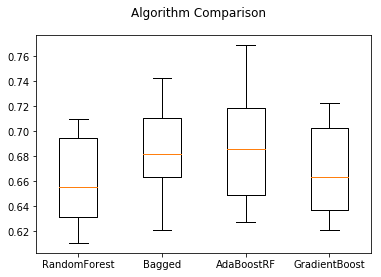

In [117]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [143]:
GBoost.fit(X_train,Y_train)
AB_RF.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                      

In [0]:
GB_pred=GBoost.predict(df_prod_x)
AB_pred=AB_RF.predict(df_prod_x)

In [145]:
from sklearn import metrics
GB_cm=metrics.confusion_matrix(true_y,GB_pred)
AB_cm=metrics.confusion_matrix(true_y,AB_pred)

print(GB_cm)

[[ 0  2  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 32 10  0  0]
 [ 0  0 15 10  0  0]
 [ 0  0  4 10  1  0]
 [ 0  0  0  1  3  0]]


In [146]:
print(AB_cm)

[[ 0  0  2  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 29 13  0  0]
 [ 0  0 18  7  0  0]
 [ 0  0  4 10  1  0]
 [ 0  0  0  3  1  0]]


In [147]:
GB_cr=metrics.classification_report(true_y,GB_pred)
AB_cr=metrics.classification_report(true_y,AB_pred)
print(GB_cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.56      0.76      0.65        42
           6       0.30      0.40      0.34        25
           7       0.25      0.07      0.11        15
           8       0.00      0.00      0.00         4

    accuracy                           0.45        96
   macro avg       0.19      0.20      0.18        96
weighted avg       0.36      0.45      0.39        96



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
print(AB_cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.49      0.69      0.57        42
           6       0.20      0.28      0.23        25
           7       0.50      0.07      0.12        15
           8       0.00      0.00      0.00         4

    accuracy                           0.39        96
   macro avg       0.20      0.17      0.15        96
weighted avg       0.35      0.39      0.33        96



In [0]:
Y_pred=pd.DataFrame(y_pred)

In [0]:
idx=np.arange(len(y_pred))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

In [0]:
Y_pred.index=idx
Y_true.index=idx

In [0]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_pred,Y_true)
print(cm)

[[45  0]
 [ 0 24]]
